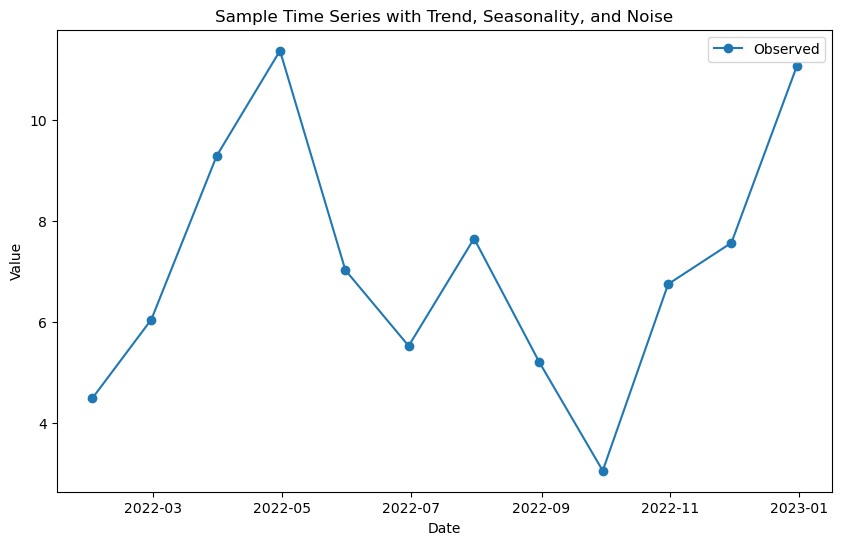

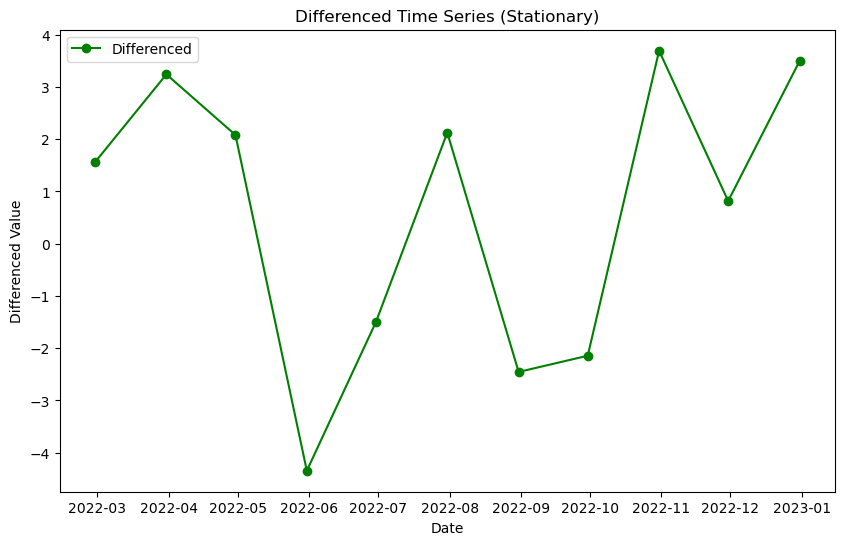

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a time index (e.g., monthly data for a year)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='M')

# Create a trend component with a slight increase over time
trend = np.arange(1, len(date_rng) + 1)

# Create a seasonal component with a sinusoidal pattern
seasonality = 5 * np.sin(2 * np.pi * np.arange(1, len(date_rng) + 1) / 12)

# Create some random noise
noise = np.random.normal(loc=0, scale=2, size=len(date_rng))

# Combine the components to create the observed time series
observed_data = trend + seasonality + noise

# Create a DataFrame with the date index and observed data
df = pd.DataFrame(index=date_rng, data={'Observed': observed_data})

# Plot the observed time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.title('Sample Time Series with Trend, Seasonality, and Noise')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Differencing to make the time series stationary
df['Differenced'] = df['Observed'].diff().dropna()







# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Differenced'], label='Differenced', marker='o', color='green')
plt.title('Differenced Time Series (Stationary)')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()



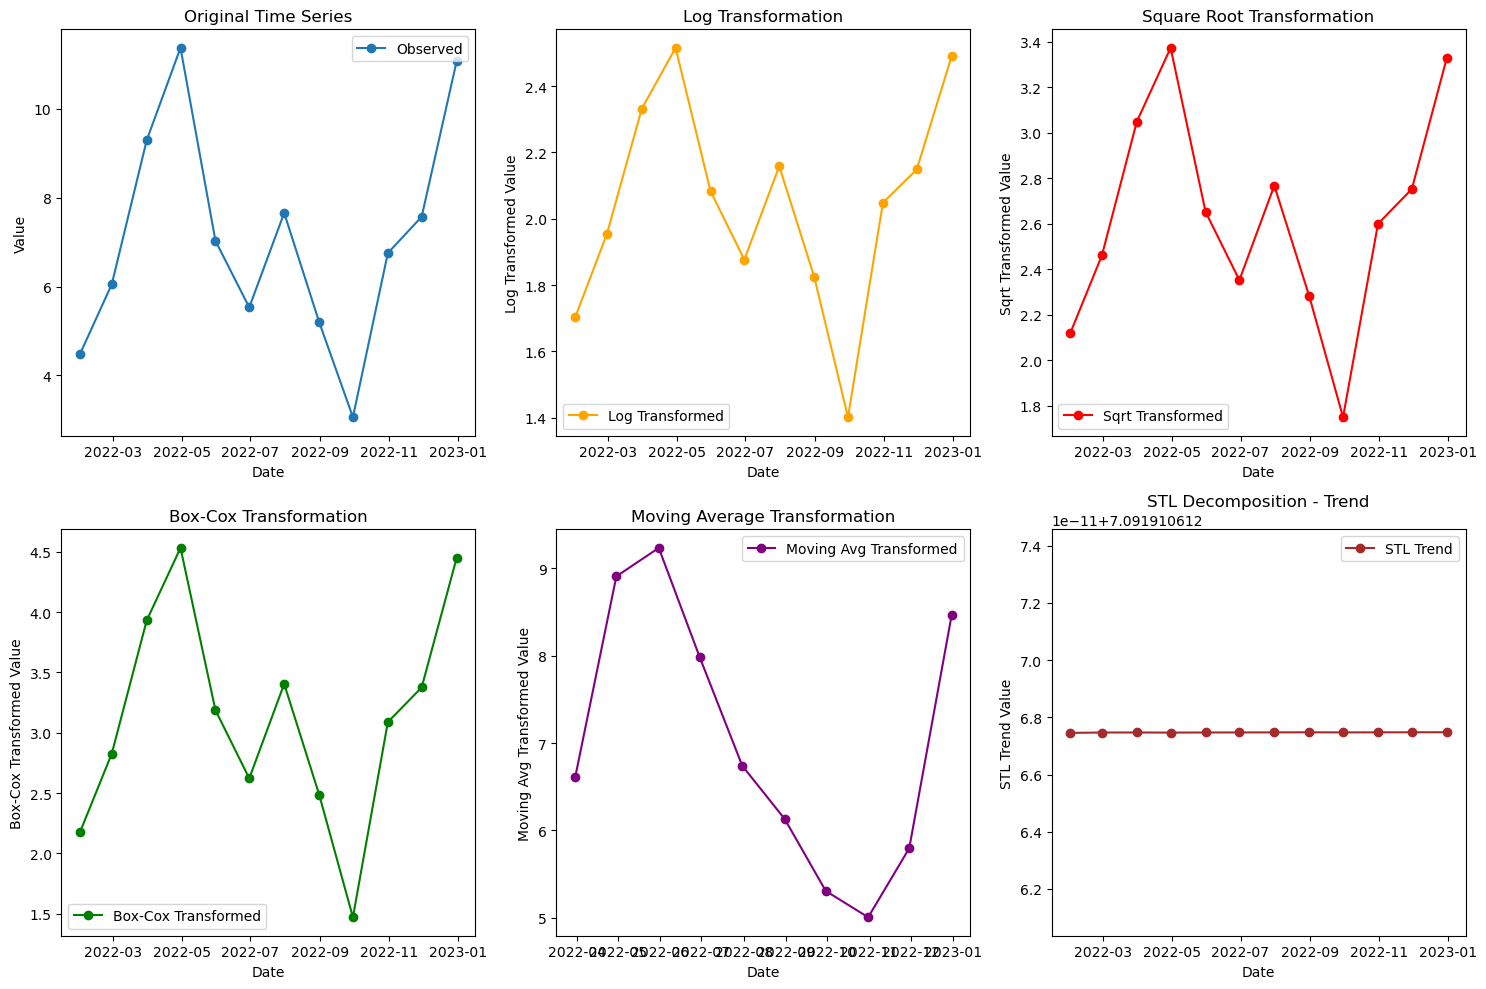

In [5]:
import matplotlib.gridspec as gridspec
from statsmodels.tsa.seasonal import STL

# Original time series plot
plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1])

# Plot the original time series
plt.subplot(gs[0])
plt.plot(df.index, df['Observed'], label='Observed', marker='o')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Log transformation plot
plt.subplot(gs[1])
plt.plot(df.index, np.log1p(df['Observed']), label='Log Transformed', marker='o', color='orange')
plt.title('Log Transformation')
plt.xlabel('Date')
plt.ylabel('Log Transformed Value')
plt.legend()

# Square root transformation plot
plt.subplot(gs[2])
plt.plot(df.index, np.sqrt(df['Observed']), label='Sqrt Transformed', marker='o', color='red')
plt.title('Square Root Transformation')
plt.xlabel('Date')
plt.ylabel('Sqrt Transformed Value')
plt.legend()

# Box-Cox transformation plot
plt.subplot(gs[3])
transformed_boxcox, lambda_value = boxcox(df['Observed'])
plt.plot(df.index, transformed_boxcox, label='Box-Cox Transformed', marker='o', color='green')
plt.title('Box-Cox Transformation')
plt.xlabel('Date')
plt.ylabel('Box-Cox Transformed Value')
plt.legend()

# Moving average transformation plot
plt.subplot(gs[4])
window_size = 3
moving_avg = df['Observed'].rolling(window=window_size).mean()
plt.plot(df.index, moving_avg, label='Moving Avg Transformed', marker='o', color='purple')
plt.title('Moving Average Transformation')
plt.xlabel('Date')
plt.ylabel('Moving Avg Transformed Value')
plt.legend()

# STL decomposition - Trend plot
plt.subplot(gs[5])
stl_result = STL(df['Observed'], seasonal=13).fit()
plt.plot(df.index, stl_result.trend, label='STL Trend', marker='o', color='brown')
plt.title('STL Decomposition - Trend')
plt.xlabel('Date')
plt.ylabel('STL Trend Value')
plt.legend()

plt.tight_layout()
plt.show()
